In [904]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Punto 1

Definicion de la funcion

Text(0, 0.5, 'Amplitud')

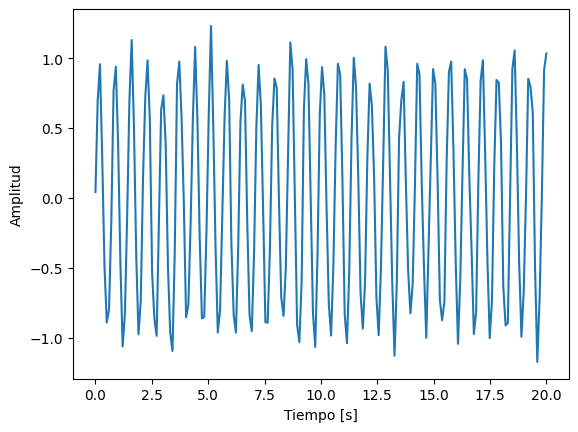

In [905]:
t = np.linspace(0,20,200)
y=np.sin(2*np.pi*np.sqrt(2)*t)
y+=np.random.normal(0.0,0.1,len(y))
plt.plot(t,y,"-")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")



Limite Nyquist para la frecuencia

In [906]:
Ny=1/((t[1]-t[0]))
Ny

np.float64(9.95)

Ecuacion de Fourier solo para una frecuencia

In [907]:
def fourier(t,y,f):
    F=0
    for i in range (len(t)):
        F+=y[i]*np.exp(-2*np.pi*1j*f*t[i])
    return(F)
f=49.95
print(fourier(t,y,f))

(3.026029534179261+0.04455079510782689j)


Punto 2

Norma de la transformada de fourier en el barrido de frecuencias

91.92960073579404


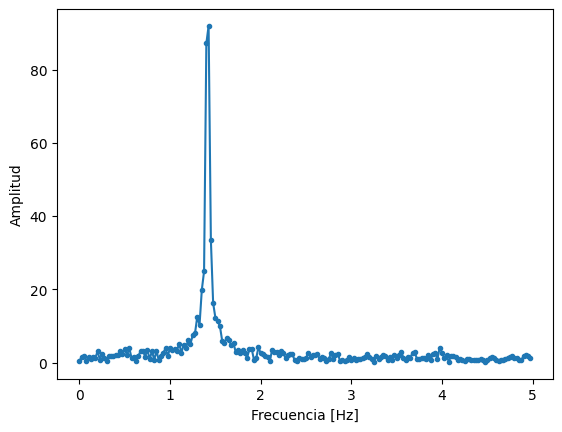

In [908]:
frecuencias=np.linspace(0,Ny/2,len(t))

FF=[]

for i in range(len(frecuencias)):
    a=frecuencias[i]
    FS=fourier(t,y,a)
    FF.append(FS)

FF=np.abs(FF)

#plt.scatter(frecuencias,FF)
plt.plot(frecuencias,FF,".-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
print(np.max(FF))



1. Si se le agrega ruido a la señal en (y) entonces la funcion de fourier se nota mas dispersa pero siguen existiendo los mismos picos con una pequeña diferencia en el maximo aproximadamente de mas o menos 2 unidades.

Punto 3

Hacemos una interpolacion alrededor de la frecuencia principal para determianr el FWHM

[0.064984]
91.92960073579404
1.4249999999999998


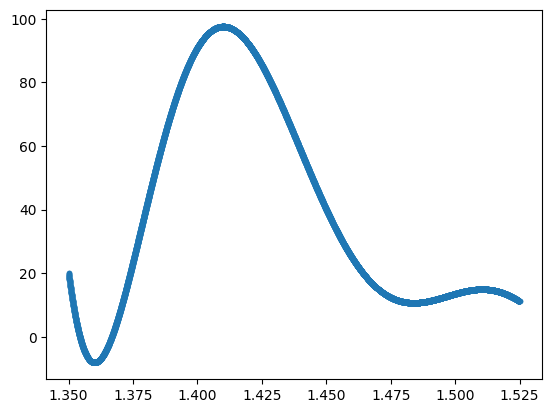

In [909]:

numero=np.max(FF)/2
maximo=np.argmax(FF)
Lista_x=[frecuencias[maximo-3],frecuencias[maximo-2],frecuencias[maximo-1],frecuencias[maximo],frecuencias[maximo+1],frecuencias[maximo+2],frecuencias[maximo+3],frecuencias[maximo+4]]
Lista_y=[FF[maximo-3],FF[maximo-2],FF[maximo-1],FF[maximo],FF[maximo+1],FF[maximo+2],FF[maximo+3],FF[maximo+4]]

coeficientes = np.polyfit(Lista_x, Lista_y, 6)
polinomio = np.poly1d(coeficientes)
x_ajustado = np.linspace(np.min(Lista_x), np.max(Lista_x), 10000)
y_ajustado = polinomio(x_ajustado)
plt.plot(x_ajustado,y_ajustado,".-")

diferencia=np.abs(numero-y_ajustado)
lista=sorted(diferencia)
numero1=np.where(diferencia==lista[0])
numero2=np.where(diferencia==lista[1])
#numero3=np.where(diferencia==lista[2])
#numero4=np.where(diferencia==lista[3])

lista1=[numero1,numero2]
numeros=[]
for i in lista1:
    numero=x_ajustado[i]
    numeros.append(numero)


fwhm=abs(numeros[1]-numeros[0])
print(fwhm)
print(np.max(FF))
print(frecuencias[maximo])





El ancho a media altura es aproximadamente 0.0647 a 0.0651
1. Al cambiar el numero de muestras el pico si cambia de posicion mas sin embargo el fwhm se mantiene "constante", ya que al cambiar el numero de muestras afecta la ecuacion para la transformada de fourier y en consecuencia hay una mejor resolucion permitiendo una frecuencia mas exacta
2. el pico se mantiane "constante" mas sin embargo la frecuencia del pico cambia. por otro lado el FWHM cambia ya que a mayor tiempo mas angosto es el pico de la transformada. 

Punto 4

In [910]:
N = 80
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)

34.81850987492139


Text(0, 0.5, 'Amplitud')

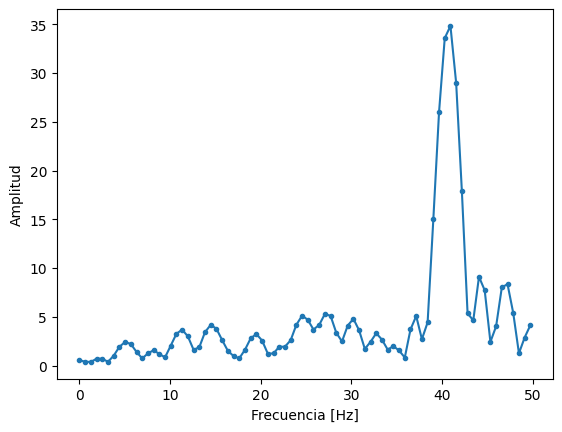

In [911]:
frecuencias_2=np.linspace(0,5*Ny,len(ts))

FF_2=[]

for i in range(len(frecuencias_2)):
    a=frecuencias[i]
    FS_2=fourier(ts,ys,a)
    FF_2.append(FS_2)

FF_2=np.abs(FF_2)

print(np.max(FF_2))

#plt.scatter(frecuencias,FF)
plt.plot(frecuencias_2,FF_2,".-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")


Al graficar la trasnformada de fourier para la señal con ruido y sin ruido se obtiene que el pico mas alto es el mismo para ambos casos de modo que si se puede recuperar la frecuencia.